In [1]:
!pip install peft==0.2.0
!wget https://huggingface.co/spaces/dylanebert/multi-view-diffusion/raw/main/requirements.txt -O requirements.txt
!pip install -r requirements.txt

--2025-03-04 16:55:50--  https://huggingface.co/spaces/dylanebert/multi-view-diffusion/raw/main/requirements.txt
Resolving huggingface.co (huggingface.co)... 18.164.174.55, 18.164.174.17, 18.164.174.118, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1893 (1.8K) [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]   1.85K  --.-KB/s    in 0s      

2025-03-04 16:55:51 (1.01 GB/s) - ‘requirements.txt’ saved [1893/1893]



In [2]:
import torch
from diffusers import DiffusionPipeline

multi_view_diffusion_pipeline = DiffusionPipeline.from_pretrained(
    "dylanebert/multi-view-diffusion",
    custom_pipeline="dylanebert/multi-view-diffusion",
    torch_dtype=torch.float16,
    trust_remote_code=True,
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

image_encoder/model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/403 [00:00<?, ?B/s]

unet/mv_unet.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'trust_remote_code': True} are not expected by MVDreamPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [33]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO



def create_image_grid(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    images = np.array(image, dtype=np.float32) / 255.0
    images = multi_view_diffusion_pipeline("", images, guidance_scale=5, num_inference_steps=30, elevation=0)
    images = [Image.fromarray((img * 255).astype("uint8")) for img in images]

    width, height = images[0].size
    grid_img = Image.new("RGB", (2 * width, 2 * height))

    grid_img.paste(images[0], (0, 0))
    grid_img.paste(images[1], (width, 0))
    grid_img.paste(images[2], (0, height))
    grid_img.paste(images[3], (width, height))

    return grid_img

  0%|          | 0/30 [00:00<?, ?it/s]

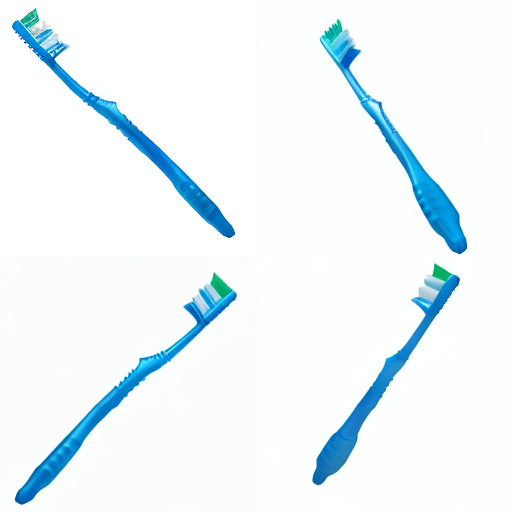

In [36]:
create_image_grid("https://github.com/Sukanth-Original/Generative3D/blob/main/images/toothbrush.jpg?raw=true")

  0%|          | 0/30 [00:00<?, ?it/s]

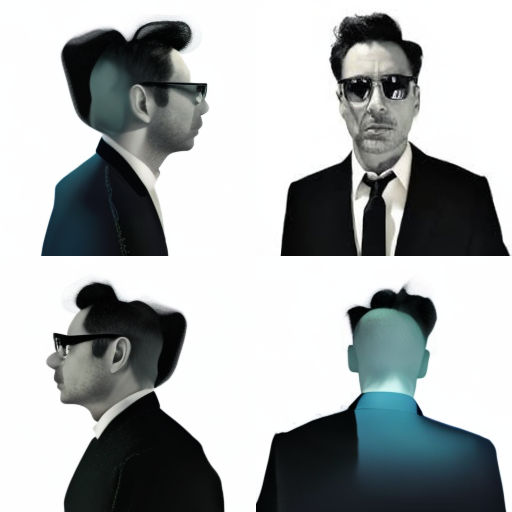

In [39]:
create_image_grid("https://github.com/Sukanth-Original/Generative3D/blob/main/images/robertdowney.jpeg?raw=true")